 COGNIFYZ DATA VISUALIZATION STARTED
 Dataset Loaded: 9,551 rows × 21 columns


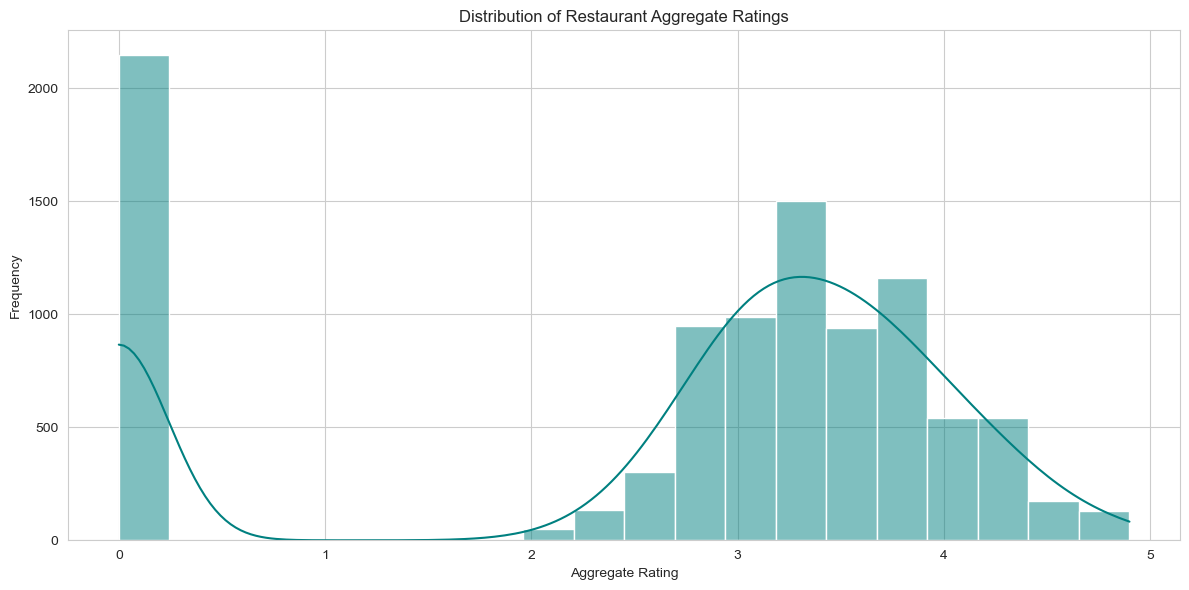


 Average Ratings by Top Cuisines


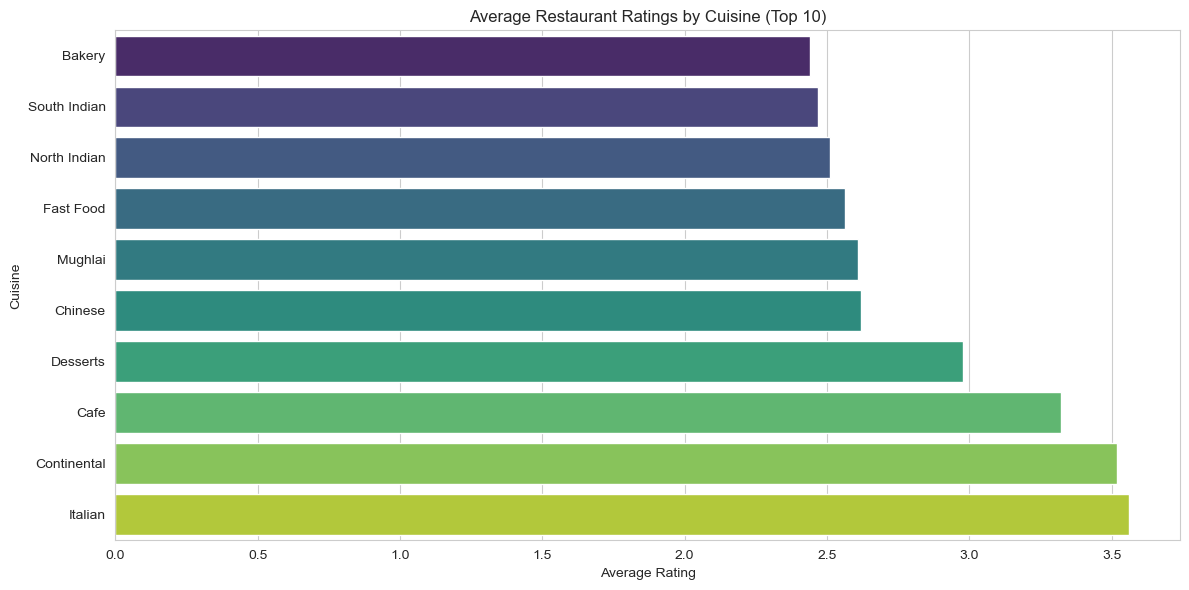


 Average Ratings by Top Cities


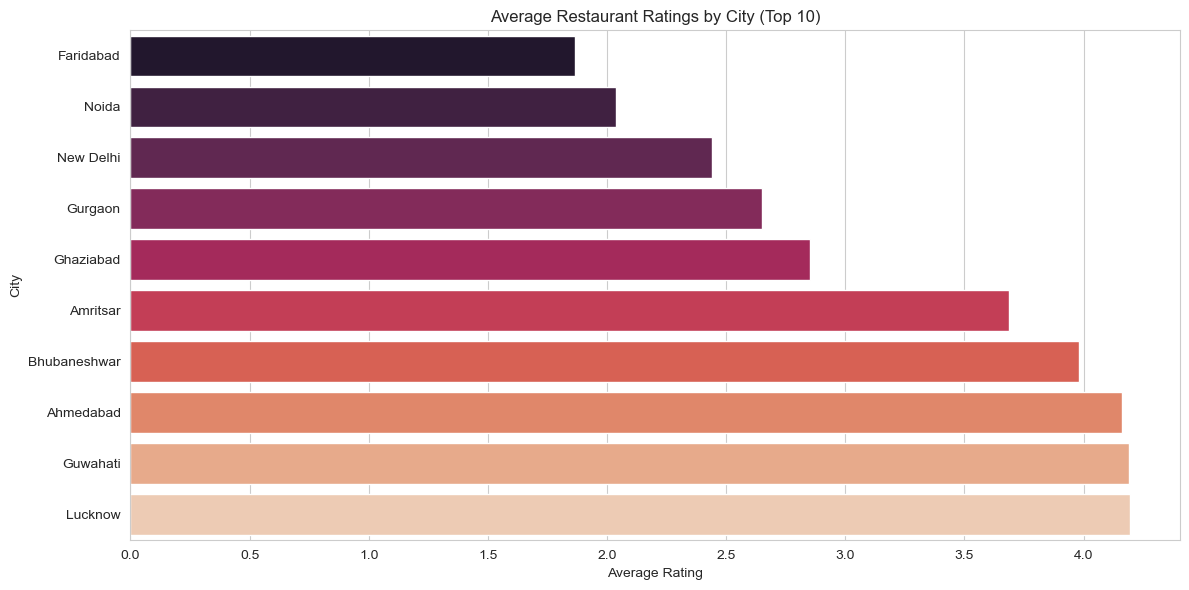


 Feature-Target Relationship

Top correlations with Aggregate rating:
Price range             0.437944
Votes                   0.313691
Country Code            0.282189
Average Cost for two    0.051792
Latitude                0.000516
Longitude              -0.116818
Restaurant ID          -0.326212
dtype: float64


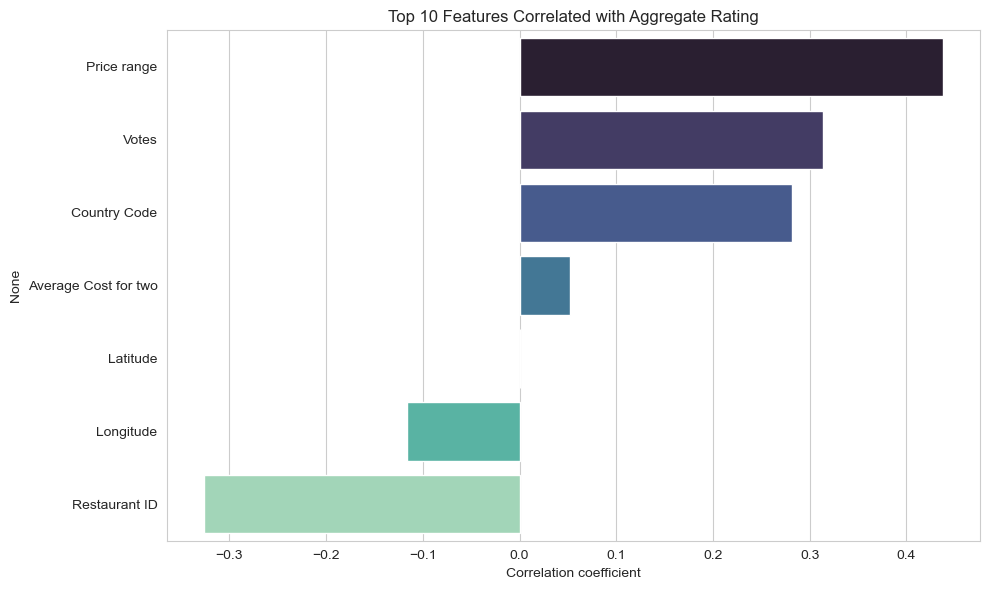


 DATA VISUALIZATION TASK COMPLETED!
 Files generated:
 - rating_distribution_histogram.png
 - avg_rating_by_cuisine.png
 - avg_rating_by_city.png
 - feature_rating_correlation.png
 Ready for Cognifyz submission!


In [1]:
# =============================================================================
# COGNIFYZ TECHNOLOGIES - DATA VISUALIZATION TASK 9
# Visualize rating distributions, compare cuisines/cities ratings,
# and visualize feature-target relationships.
# Academic Integrity: 100% Original Code
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print(" COGNIFYZ DATA VISUALIZATION STARTED")
print("="*80)

# 1. Load dataset
df = pd.read_csv('Dataset .csv')
print(f" Dataset Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# 2. Rating distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of Restaurant Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rating_distribution_histogram.png')
plt.show()

# 3. Compare average ratings of top cuisines
print("\n Average Ratings by Top Cuisines")
# Explode cuisines list
df_exp = df.copy()
df_exp['Cuisines'] = df_exp['Cuisines'].fillna('')
df_exp = df_exp.assign(Cuisine=df_exp['Cuisines'].str.split(',')).explode('Cuisine')
df_exp['Cuisine'] = df_exp['Cuisine'].str.strip()

top_cuisines = df_exp['Cuisine'].value_counts().head(10).index
avg_rating_cuisines = df_exp[df_exp['Cuisine'].isin(top_cuisines)].groupby('Cuisine')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cuisines.values, y=avg_rating_cuisines.index, palette='viridis')
plt.title('Average Restaurant Ratings by Cuisine (Top 10)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('avg_rating_by_cuisine.png')
plt.show()

# 4. Compare average ratings of top cities
print("\n Average Ratings by Top Cities")
top_cities = df['City'].value_counts().head(10).index
avg_rating_cities = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cities.values, y=avg_rating_cities.index, palette='rocket')
plt.title('Average Restaurant Ratings by City (Top 10)')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('avg_rating_by_city.png')
plt.show()

# 5. Visualize relationship between features and rating
print("\n Feature-Target Relationship")

# Select numerical features for correlation
numerical_cols = df.select_dtypes(include='number').columns.drop('Aggregate rating')
correlations = df[numerical_cols].corrwith(df['Aggregate rating']).sort_values(ascending=False)

print("\nTop correlations with Aggregate rating:")
print(correlations.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.head(10).values, y=correlations.head(10).index, palette='mako')
plt.title('Top 10 Features Correlated with Aggregate Rating')
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.savefig('feature_rating_correlation.png')
plt.show()

print("\n DATA VISUALIZATION TASK COMPLETED!")
print(" Files generated:")
print(" - rating_distribution_histogram.png")
print(" - avg_rating_by_cuisine.png")
print(" - avg_rating_by_city.png")
print(" - feature_rating_correlation.png")
print(" Ready for Cognifyz submission!")
